In [140]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scipy as sp
#import sympy.solvers.solvers as smp

<h1> 1 точка Лагранжа

In [163]:
alphas = np.linspace(0, 1, 1000)
u = smp.Symbol('u')

s0 = -1
s1 = 1
us = []
R = []
corR = []
for a in alphas:
    f = (u**2)*(1 - s1 + 3*u + 3*u**2 + u**3) - a*(s0 + 2*s0*u + (1 + s0 - s1)*u**2 + 2*u**3 + u**4)
    res = smp.solvers.solvers.nsolve(f, (-10, 10), solver = 'bisect')
    us.append(res)
    R.append(1 - a + res)
    corR.append(1 - (a/3)**(1/3))

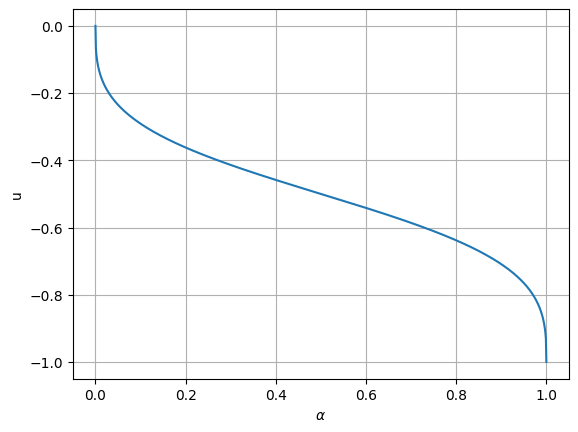

In [142]:
#plot u(a)
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('u')
plt.plot(alphas, us)
plt.savefig('l1u.pdf', format = 'pdf')

In [164]:
#approximate
deg = 10
coef = np.polyfit(alphas, np.array(R).astype(np.float64), deg)
print(coef)
approx = []
for alpha in alphas:
    curr = 0
    for i in range(deg+1): curr += coef[i]*alpha**(deg - i)
    approx.append(curr)
diff = np.array(R).astype(np.float64)-approx
print(np.linalg.norm(diff))
print(np.linalg.norm(diff)/np.linalg.norm(np.array(R).astype(np.float64)))
print(max(np.delete(diff, np.where(diff == max(diff)))))
#fit to one monomial
'''
def est(x, a, b, c):
    return c + (b*x)**a
popt, pcov = sp.optimize.curve_fit(est, alphas, np.array(R).astype(np.float64), bounds = (0, [np.inf, np.inf, np.inf]))
print(popt)
'''

[-5.42117676e-05 -7.75071030e+02  3.48782027e+03 -6.64023049e+03
  6.96431130e+03 -4.39300641e+03  1.70998568e+03 -4.06949599e+02
  5.73806703e+01 -6.06815842e+00  9.13906205e-01]
0.15220331009034183
0.010754861338480682
0.023374870122204072


'\ndef est(x, a, b, c):\n    return c + (b*x)**a\npopt, pcov = sp.optimize.curve_fit(est, alphas, np.array(R).astype(np.float64), bounds = (0, [np.inf, np.inf, np.inf]))\nprint(popt)\n'

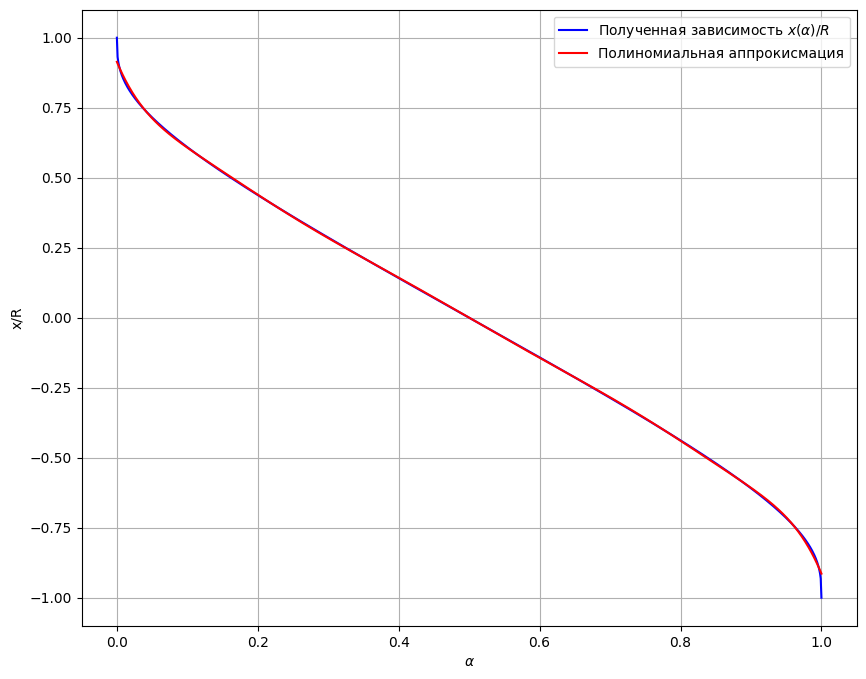

In [144]:
#plot R(u)
plt.figure(figsize = (10, 8))
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('x/R')
#plt.plot(alphas, est(alphas, *popt), color = 'yellow')
plt.plot(alphas, R, color = 'blue', label = r'Полученная зависимость $x(\alpha)/R$')
#plt.plot(alphas, corR, color = 'green')
plt.plot(alphas, approx, color = 'red', label = 'Полиномиальная аппрокисмация')
plt.legend()
plt.savefig('l1x.pdf', format = 'pdf')

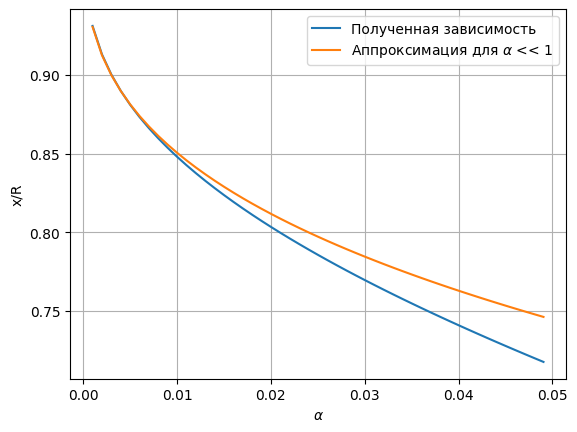

In [145]:
#compare with corR for smaler alphas
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('x/R')
plt.plot(alphas[1:50], R[1:50], label = 'Полученная зависимость')
plt.plot(alphas[1:50], corR[1:50], label = r'Аппроксимация для $\alpha$ << 1')
plt.legend()
plt.savefig('l1xsm.pdf', format = 'pdf')

In [146]:
diff = np.array(R).astype(np.float64)[1:30] - corR[1:30]
print(np.linalg.norm(diff))

0.03995123990555423


<h1> 2 точка Лагранжа

In [165]:
alphas = np.linspace(0, 1, 1000)
u = smp.Symbol('u')

s0 = 1
s1 = 1
us = []
R = []
corR = []
for a in alphas:
    f = (u**2)*(1 - s1 + 3*u + 3*u**2 + u**3) - a*(s0 + 2*s0*u + (1 + s0 - s1)*u**2 + 2*u**3 + u**4)
    res = smp.solvers.solvers.nsolve(f, (-10, 10), solver = 'bisect')
    us.append(res)
    R.append(1 - a + res)
    corR.append(1 + (a/3)**(1/3))

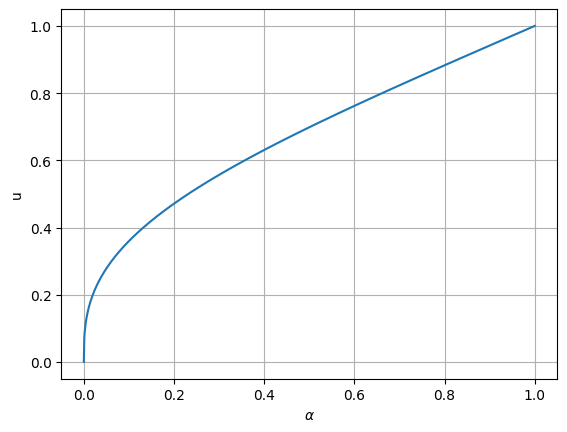

In [148]:
#plot u(a)
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('u')
plt.plot(alphas, us)
plt.savefig('l2u.pdf', format = 'pdf')

In [166]:
#approximate
deg = 10
coef = np.polyfit(alphas, np.array(R).astype(np.float64), deg)
print(coef)
approx = []
for alpha in alphas:
    curr = 0
    for i in range(deg+1): curr += coef[i]*alpha**(deg - i)
    approx.append(curr)
diff = np.array(R).astype(np.float64)-approx
print(np.linalg.norm(diff))
print(np.linalg.norm(diff)/np.linalg.norm(np.array(R).astype(np.float64)))
print(max(np.delete(diff, np.where(diff == max(diff)))))
#fit to one monomial
'''
def est(x, a, b, c):
    return c + (b*x)**a
popt, pcov = sp.optimize.curve_fit(est, alphas, np.array(R).astype(np.float64), bounds = (0, [np.inf, np.inf, np.inf]))
print(popt)
'''

[-1.41502026e+03  7.50239082e+03 -1.71349677e+04  2.20596564e+04
 -1.75924642e+04  8.99852403e+03 -2.95930097e+03  6.12711890e+02
 -7.71568458e+01  5.53632472e+00  1.08709947e+00]
0.10918958323677008
0.0029400505662148203
0.011645795791506819


'\ndef est(x, a, b, c):\n    return c + (b*x)**a\npopt, pcov = sp.optimize.curve_fit(est, alphas, np.array(R).astype(np.float64), bounds = (0, [np.inf, np.inf, np.inf]))\nprint(popt)\n'

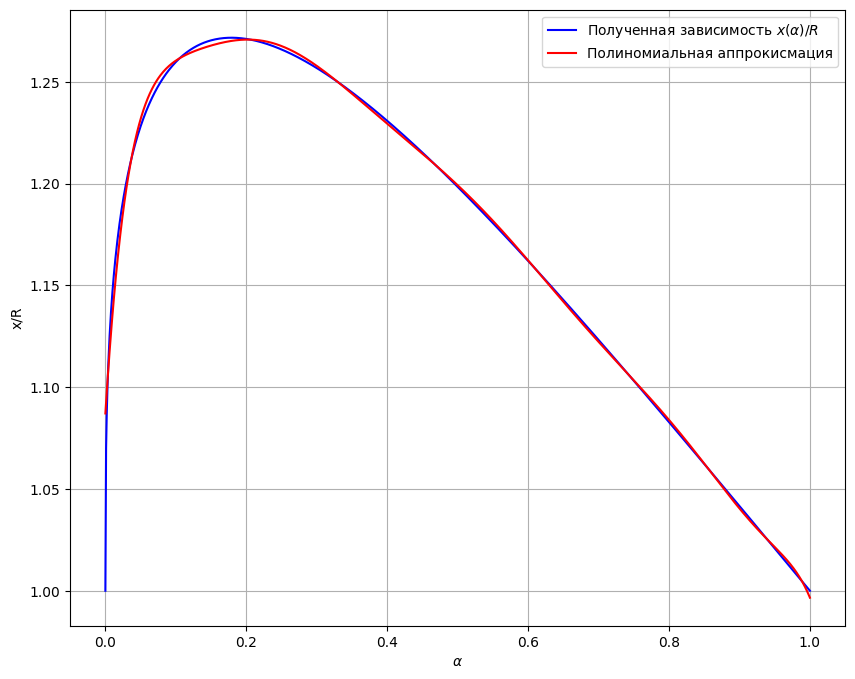

In [150]:
#plot R(u)
plt.figure(figsize = (10, 8))
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('x/R')
#plt.plot(alphas, est(alphas, *popt), color = 'yellow')
plt.plot(alphas, R, color = 'blue', label = r'Полученная зависимость $x(\alpha)/R$')
#plt.plot(alphas, corR, color = 'green')
plt.plot(alphas, approx, color = 'red', label = 'Полиномиальная аппрокисмация')
plt.legend()
plt.savefig('l2x.pdf', format = 'pdf')

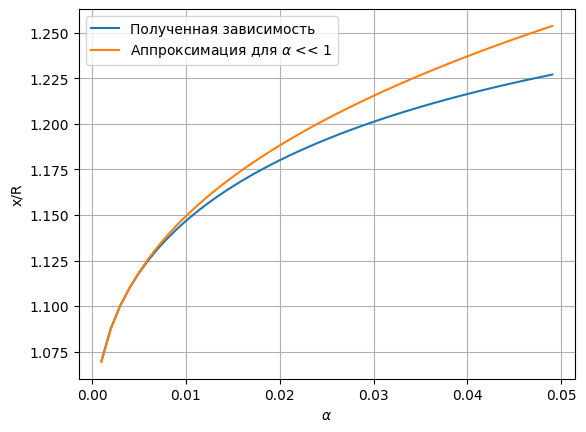

In [151]:
#compare with corR for smaler alphas
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('x/R')
plt.plot(alphas[1:50], R[1:50], label = 'Полученная зависимость')
plt.plot(alphas[1:50], corR[1:50], label = r'Аппроксимация для $\alpha$ << 1')
plt.legend()
plt.savefig('l2xsm.pdf', format = 'pdf')

<h1> 3 точка Лагранжа 

In [152]:
alphas = np.linspace(0, 1, 1000)
u = smp.Symbol('u')

s0 = -1
s1 = -1
us = []
R = []
corR = []
for a in alphas:
    f = (u**2)*(1 - s1 + 3*u + 3*u**2 + u**3) - a*(s0 + 2*s0*u + (1 + s0 - s1)*u**2 + 2*u**3 + u**4)
    res = smp.solvers.solvers.nsolve(f, (-10, 10), solver = 'bisect')
    us.append(res)
    R.append(1 - a + res)
    corR.append(-(1 + 5/12*a))

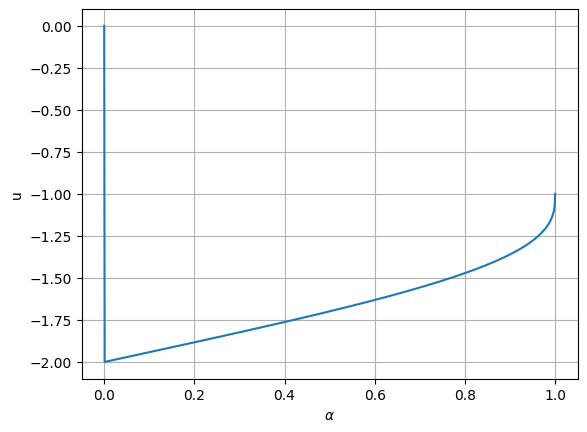

In [153]:
#plot u(a)
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('u')
plt.plot(alphas, us)
plt.savefig('l3u.pdf', format = 'pdf')

In [154]:
#approximate
deg = 1
coef = np.polyfit(alphas, np.array(R).astype(np.float64), deg)
print(coef)
approx = []
for alpha in alphas:
    curr = 0
    for i in range(deg+1): curr += coef[i]*alpha**(deg - i)
    approx.append(curr)
diff = np.array(R).astype(np.float64)-approx
print(np.linalg.norm(diff))
print(max(np.delete(diff, np.where(diff == max(diff)))))
#fit to one monomial
'''
def est(x, a, b, c):
    return c + (b*x)**a
popt, pcov = sp.optimize.curve_fit(est, alphas, np.array(R).astype(np.float64), bounds = (0, [np.inf, np.inf, np.inf]))
print(popt)
'''

[-0.27187979 -1.0334811 ]
2.3587093454048778
0.3053608802169243


'\ndef est(x, a, b, c):\n    return c + (b*x)**a\npopt, pcov = sp.optimize.curve_fit(est, alphas, np.array(R).astype(np.float64), bounds = (0, [np.inf, np.inf, np.inf]))\nprint(popt)\n'

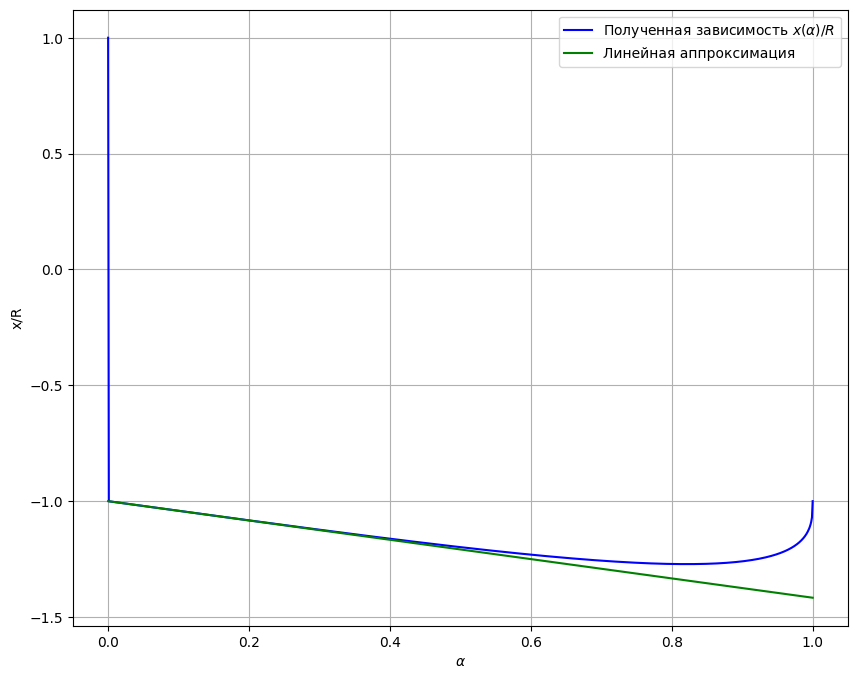

In [155]:
#plot R(u)
plt.figure(figsize = (10, 8))
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('x/R')
#plt.plot(alphas, est(alphas, *popt), color = 'yellow')
plt.plot(alphas, R, color = 'blue', label = r'Полученная зависимость $x(\alpha)/R$')
#plt.plot(alphas, corR, color = 'green')
#plt.plot(alphas, approx, color = 'red', label = 'Полиномиальная аппрокисмация')
plt.plot(alphas, corR, label = 'Линейная аппроксимация', color = 'green')
plt.legend()
plt.savefig('l3x.pdf', format = 'pdf')

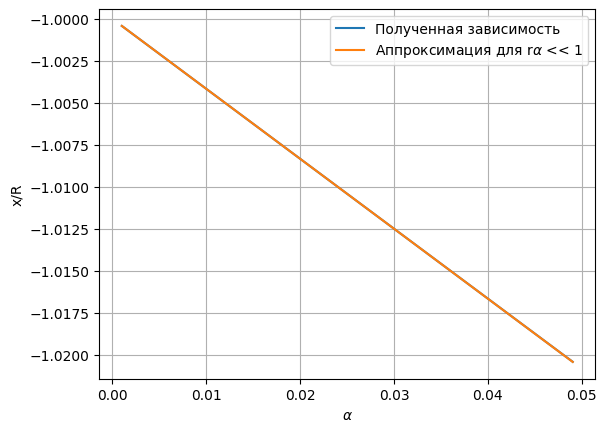

In [156]:
#compare with corR for smaler alphas
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel('x/R')
plt.plot(alphas[1:50], R[1:50], label = 'Полученная зависимость')
plt.plot(alphas[1:50], corR[1:50], label = r'Аппроксимация для r$\alpha$ << 1')
plt.legend()

<h1> 3 точка Лагранжа 

In [157]:
alphas = np.linspace(0, 1, 1000)
u = smp.Symbol('u')

s0 = -1
s1 = -1
us = []
R = []
corR = []
for a in alphas:
    f = (u**2)*(1 - s1 + 3*u + 3*u**2 + u**3) - a*(s0 + 2*s0*u + (1 + s0 - s1)*u**2 + 2*u**3 + u**4)
    res = smp.solvers.solvers.nsolve(f, (-10, 10), solver = 'bisect')
    us.append(res)
    R.append(1 - a + res)
    corR.append(-(1 + 5/12*a))

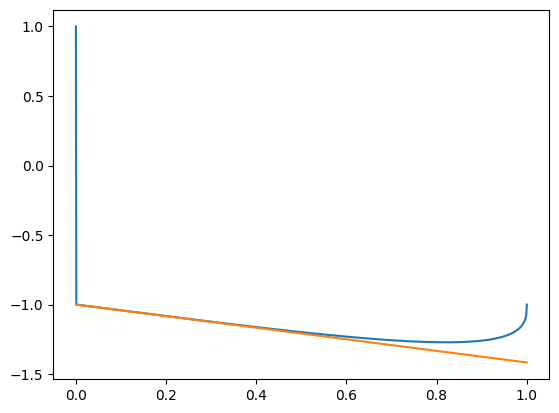

In [158]:
plt.plot(alphas, R)
plt.plot(alphas, corR)

<h1> Stuff

In [159]:
s0, s1 = 1, 1
for i in range(1000): print((us[i]**2)*(1 - s1 + 3*us[i] + 3*us[i]**2 + us[i]**3) - alphas[i]*(s0 + 2*s0*us[i] + (1 + s0 - s1)*us[i]**2 + 2*us[i]**3 + us[i]**4))

0
-7.98932567547902
-7.97865738819414
-7.96799513553195
-7.95733891488132
-7.94668872363325
-7.93604455918095
-7.92540641891986
-7.91477430024759
-7.90414820056394
-7.89352811727094
-7.88291404777286
-7.87230598947613
-7.86170393978942
-7.85110789612362
-7.84051785589186
-7.82993381650947
-7.81935577539403
-7.80878372996533
-7.79821767764542
-7.78765761585859
-7.77710354203134
-7.76655545359245
-7.75601334797296
-7.74547722260611
-7.73494707492743
-7.72442290237472
-7.71390470238800
-7.70339247240961
-7.69288620988410
-7.68238591225835
-7.67189157698146
-7.66140320150484
-7.65092078328218
-7.64044431976944
-7.62997380842487
-7.61950924670902
-7.60905063208475
-7.59859796201716
-7.58815123397371
-7.57771044542412
-7.56727559384047
-7.55684667669709
-7.54642369147065
-7.53600663564015
-7.52559550668689
-7.51519030209449
-7.50479101934891
-7.49439765593844
-7.48401020935369
-7.47362867708763
-7.46325305663553
-7.45288334549503
-7.44251954116612
-7.43216164115112
-7.42180964295472
-7.41146

In [160]:
testx = np.linspace(1, 1000, 1000)
testy = testx*2
print(np.polyfit(testx, testy, 10))

[ 1.60074352e-38 -7.39726704e-35  1.49680798e-31 -1.74890885e-28
  1.29902790e-25 -6.30429973e-23  1.96874939e-20 -3.76251122e-18
  4.02662229e-16  2.00000000e+00  9.16748835e-13]
